# Optical Fibre and It's Properties. 

## Usage 
While creating any optical fibre you must provide the following details 
- n1, n2, and profile type (the default profile is step index)
or 
- n1 and refractive index difference

The model will throw an error if incomplete information is provided. 

ex1

`myfibre = OpticalFibre(core_n=1.46, cladding_n=1.39, index="Graded")`

ex2

`myfibre = OpticalFibre(core_n=1.46, refractive_index_difference=0.01, index="Step")`


invalid entry

`myfibre = OpticalFibre(index="Step")`

or 

`myfibre = OpticalFibre(refractive_index_difference=0.01, index="Step")`

Then you can see all the intrensic model parameters :

```
Optical Fibre Properties:
Critical Angle:72.18602353338088
Acceptance Angle:26.52922450390899
Numerical Apparture:0.4466542286825459
Profile :Graded Index Fibre
```

Formulas
![Imgur](https://i.ibb.co/34Hym0K/Screenshot-2020-03-02-at-1-24-54-AM.png)

## Plotting the Profiles

**Currently only supporting alpha ==2**

The curves can then be plotted by invoking plot_profile method

![Graded](https://www.its.bldrdoc.gov/fs-1037/equats/37c_30.gif)

`fibre1.plot_profile(core_radius=30, cladding_radius=50)`

In [1]:
from opticalfibre import OpticalFibre

In [5]:
# core_n=input("Input core refractive index: ")
# cladding_n = input("Input cladding refractive index: ")
# index=input("Input profile index Step/Graded: ")
#write in micrometer
fibre1 = OpticalFibre(
    core_radius=(62.5)/2,
    cladding_radius=(92.5)/2,
    core_n=1.48,
    refractive_index_difference=0.01,
    index="Step",
    wavelength=840e-3,
)

Optical Fibre Properties:
Critical Angle:81.89038554400581
Acceptance Angle:12.081544981155687
Numerical Apparture:0.20930360723121808
Profile :Step Index Fibre
Normalised Frequency :48.899801094198274
Guided Mode :1195
Mode :Multi Mode


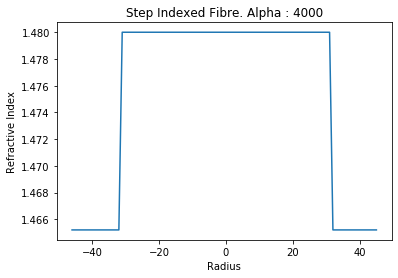

In [6]:
fibre1.plot_profile(alpha=4000)

In [4]:
# fibre1.plot_multiple_profile(alphas=[1,2,4,7,10,10000])